In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm


def standardization(data):
    mu = np.mean(data,axis=0)
    sigma = np.std(data,axis=0)
    return (data-mu)/sigma

def sum_of_square_error(y_predict, y_true):
    X = (y_true - y_predict)**2
    return np.sum(X)

def sigmoid(X):
    X = np.asarray(X,dtype=np.float64)
    return 1/(1+np.exp(-X))

def sigmoid_derivative(X):
    return sigmoid(X)*(1-sigmoid(X))

# import and preprocess data
df = pd.read_csv('2024_energy_efficiency_data.csv')
# one hot encoding
df = pd.get_dummies(df, columns=['Orientation','Glazing Area Distribution'])
df = df.drop(labels='Cooling Load',axis=1)
cols = ['# Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
 'Overall Height', 'Glazing Area']
df[cols] = df[cols].apply(standardization)
# shuffle and split
training_set = df.sample(frac=0.75, random_state=313552034)
testing_set = df.drop(training_set.index)
# separate features and labels
X_training_set = training_set.drop(labels='Heating Load',axis=1).to_numpy()
Y_training_set = training_set['Heating Load'].to_numpy().reshape(-1,1)
X_testing_set = testing_set.drop(labels='Heating Load',axis=1).to_numpy()
Y_testing_set = testing_set['Heating Load'].to_numpy().reshape(-1,1)

EPOCH = 10000
learning_rate = 0.001
np.random.seed(313552034)
W1 = np.random.uniform(low=-1, high=1, size=(16, 10))
W2 = np.random.uniform(low=-1, high=1, size=(10, 1))



mse = np.zeros(EPOCH)
for i in tqdm(range(EPOCH),desc="Loading", unit="iteration"):
    ran = np.random.randint(len(Y_training_set))
    This_X_training_set = X_training_set[ran].reshape(1,-1)
    This_Y_training_set = Y_training_set[ran].reshape(1,-1)

    # Layer 1
    Z1 = np.dot(This_X_training_set,W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    # Layer 2
    Z2 = np.dot(Z1,W2)
    # Error
    mse[i] = sum_of_square_error(This_Y_training_set,Z2)
    if i % (EPOCH//10) == 0: tqdm.write(f"Iteration {i}, MSE: {mse[i]}")  

    # back propagation
    delta_error_layer2 = 2 * (Z2 - This_Y_training_set)
    delta_W2 = np.dot(A1.T, delta_error_layer2)
    delta_error_layer1 = np.dot(delta_error_layer2, W2.T) * sigmoid_derivative(A1)
    delta_W1 = np.dot(This_X_training_set.T, delta_error_layer1)
    # update weights
    W1 = W1 - learning_rate * delta_W1
    W2 = W2 - learning_rate * delta_W2


print("Training E_MRS: ",math.sqrt(mse[EPOCH-1]/len(Y_training_set)))
A1=np.dot(X_testing_set,W1)
A2=np.dot(A1,W2)
mse_tmp =  (Y_testing_set - A2)**2
mse_test = math.sqrt(np.sum(mse_tmp)/len(Y_testing_set))
print("Testing E_MRS: ",mse_test)


Loading:   9%|▉         | 934/10000 [00:00<00:01, 4723.81iteration/s]

Iteration 0, MSE: 325.5457316946361


Loading:  19%|█▉        | 1933/10000 [00:00<00:01, 4810.50iteration/s]

Iteration 1000, MSE: 19.65838272954912


Loading:  24%|██▍       | 2416/10000 [00:00<00:01, 4483.66iteration/s]

Iteration 2000, MSE: 0.02116016145890343


Loading:  36%|███▌      | 3612/10000 [00:00<00:01, 3301.07iteration/s]

Iteration 3000, MSE: 0.0214088388208846


Loading:  45%|████▍     | 4451/10000 [00:01<00:01, 3729.79iteration/s]

Iteration 4000, MSE: 6.601308100341796


Loading:  55%|█████▍    | 5490/10000 [00:01<00:01, 2737.77iteration/s]

Iteration 5000, MSE: 0.9198686101179857


Loading:  63%|██████▎   | 6309/10000 [00:01<00:01, 2556.84iteration/s]

Iteration 6000, MSE: 36.511518879904166


Loading:  75%|███████▍  | 7452/10000 [00:02<00:00, 2795.71iteration/s]

Iteration 7000, MSE: 35.789136452273894


Loading:  83%|████████▎ | 8270/10000 [00:02<00:00, 2522.65iteration/s]

Iteration 8000, MSE: 0.35287164986523734


Loading: 100%|██████████| 10000/10000 [00:03<00:00, 3245.19iteration/s]

Iteration 9000, MSE: 22.064848092928067
Training E_MRS:  0.30118767685647646


Testing E_MRS:  2.9821259792300188


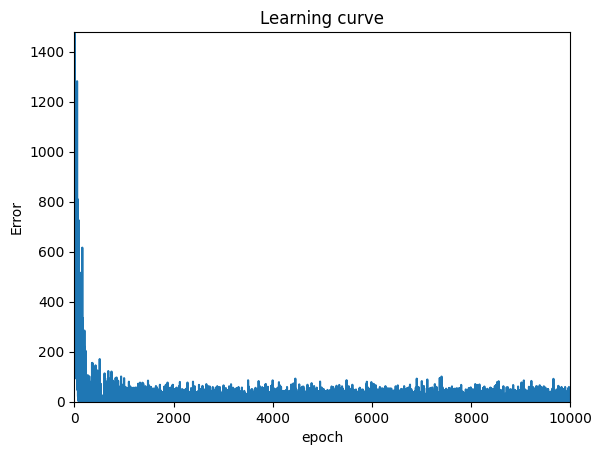

In [42]:
# plot learning curve
num_epoch = np.arange(0,EPOCH)
plt.ylim(0,np.max(mse))
plt.xlim(0,EPOCH)
plt.xlabel('epoch')
plt.ylabel('Error')
plt.plot(num_epoch,mse)
plt.title("Learning curve")
plt.show()

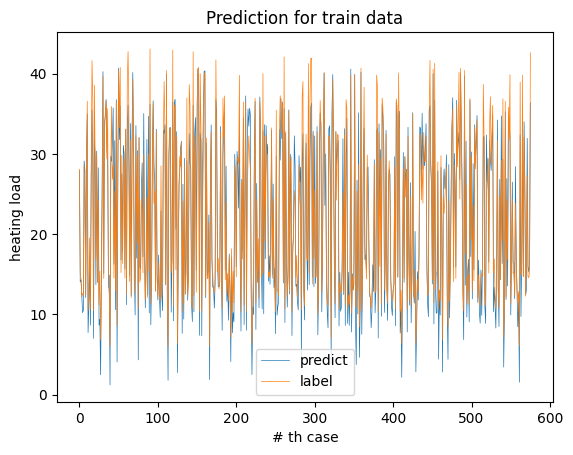

In [43]:
# Plots predicted vs. actual heating load for the training data.
num_training_set = np.arange(0,len(Y_training_set))
A1=np.dot(X_training_set,W1)
A2=np.dot(A1,W2)
plot_training_predict = A2
plot_training_true = Y_training_set

plt.xlabel('# th case')
plt.ylabel('heating load')
plt.plot(num_training_set,plot_training_predict , label = "predict",linewidth='0.5')
plt.plot(num_training_set,plot_training_true , label = "label",linewidth='0.5')
plt.title("Prediction for train data")
plt.legend()
plt.show()


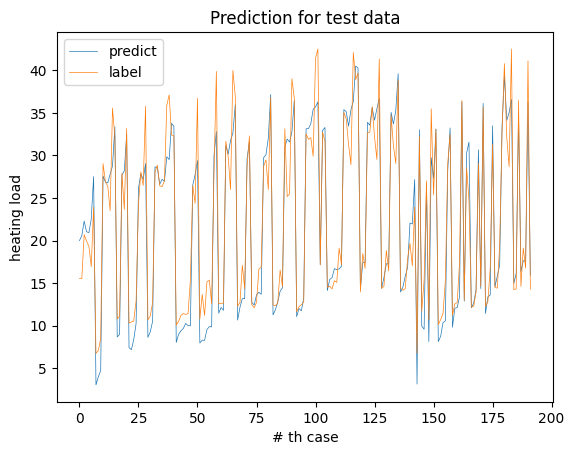

In [44]:
# Plots predicted vs. actual heating load for the test data.
num_test_set = np.arange(len(Y_testing_set))
A1=np.dot(X_testing_set,W1)
A2=np.dot(A1,W2)
plot_testing_predict = A2
plot_testing_true = Y_testing_set


plt.xlabel('# th case')
plt.ylabel('heating load')
plt.plot(num_test_set,plot_testing_predict ,  label = "predict",linewidth='0.5')
plt.plot(num_test_set,plot_testing_true , label = "label",linewidth='0.5')
plt.title("Prediction for test data")
plt.legend()
plt.show()
